## Exploratory data analysis, visualization, machine learning
original code: https://kaggle-kr.tistory.com/17?category=868316

In [1]:
import numpy as np #numpy는 선형대수 기반의 배열로 데이터를 다룬다.
import pandas as pd #pandas는 numpy를 기반으로 만들어졌으며, 2차원 데이터를 다룬다.
import matplotlib.pyplot as plt #matplot은 python에서 plot을 통해 시각화할 때 많이 사용된다.
import seaborn as sns #seaborn은 좀 더 사용자 친화적인 시각화 라이브러리이다. 

sns.set(font_scale = 2.5) #seaborn setting

import missingno as msno #missingno는 결측치를 찾는데 도움을 주는 라이브러리이다.

import warnings #warnings은 error message를 다루는데 도움을 준다
warnings.filterwarnings(action='ignore') #경고메시지를 무시하도록 설정한다.

#Rich output을 바로 시각화하도록 설정
%matplotlib inline 

In [2]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv') #data frame for training data
df_test = pd.read_csv('/kaggle/input/titanic/test.csv') #data frame for test data
#2차원 데이터이므로 pandas로 불러온다

In [3]:
df_train.head() #첫번째 다섯 줄을 읽어온다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe() #training data의 요약을 본다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Null Check

In [5]:
#training data에서 각 column별로 결측데이터 비율을 살펴본다.
for col in df_train.columns:
    null = 100 * (df_train[col].isnull().sum() / df_train[col].shape[0])
    print(f"column: {col:>10}\t Percent of NaN value: {null:.2f}%")

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [6]:
#test data에서 각 column별로 결측데이터 비율을 살펴본다.
for col in df_test.columns:
    null = 100 * (df_test[col].isnull().sum() / df_test[col].shape[0])
    print(f"column: {col:>10}\t Percent of NaN value: {null:.2f}%")

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


<Axes: >

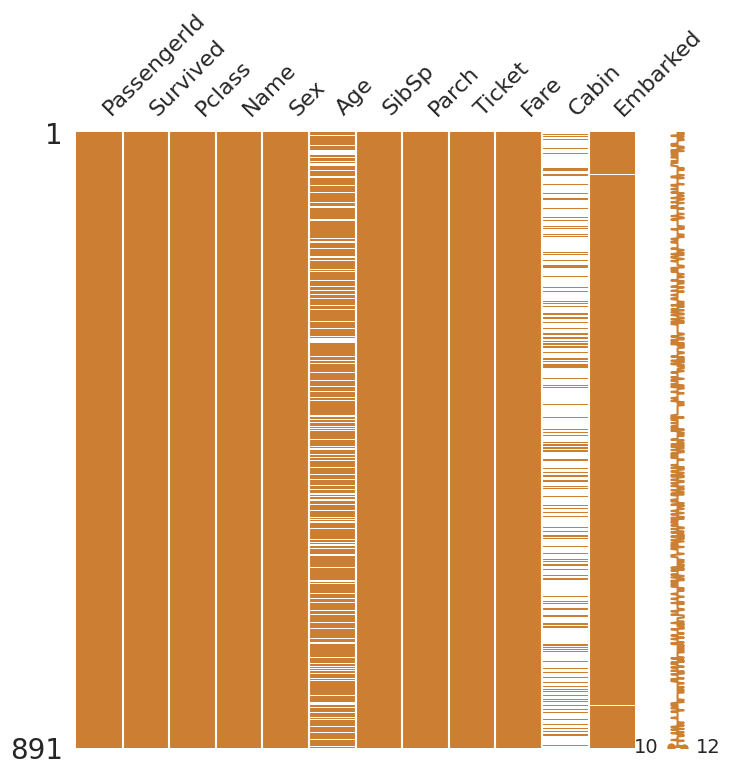

In [7]:
#visualize the null data
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<Axes: >

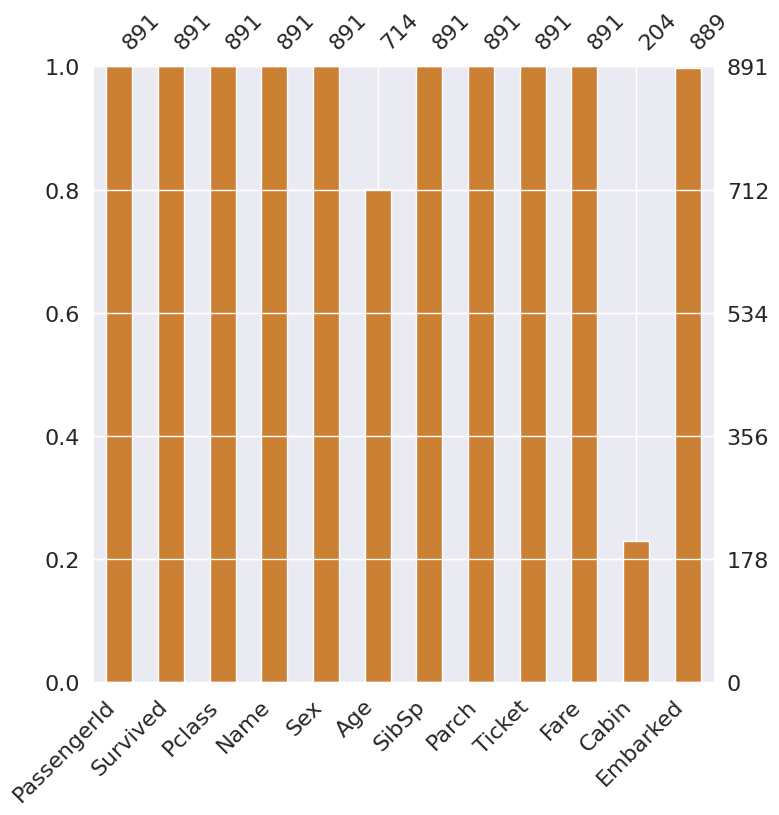

In [8]:
#visualize the null data
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<Axes: >

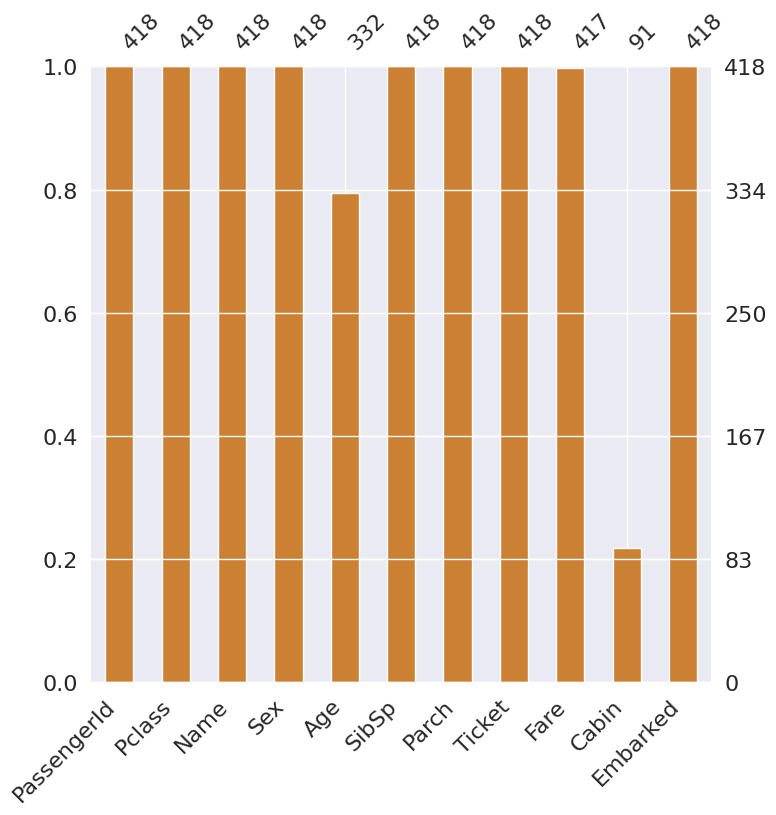

In [9]:
#visualize the null data
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

## Traget Label Check

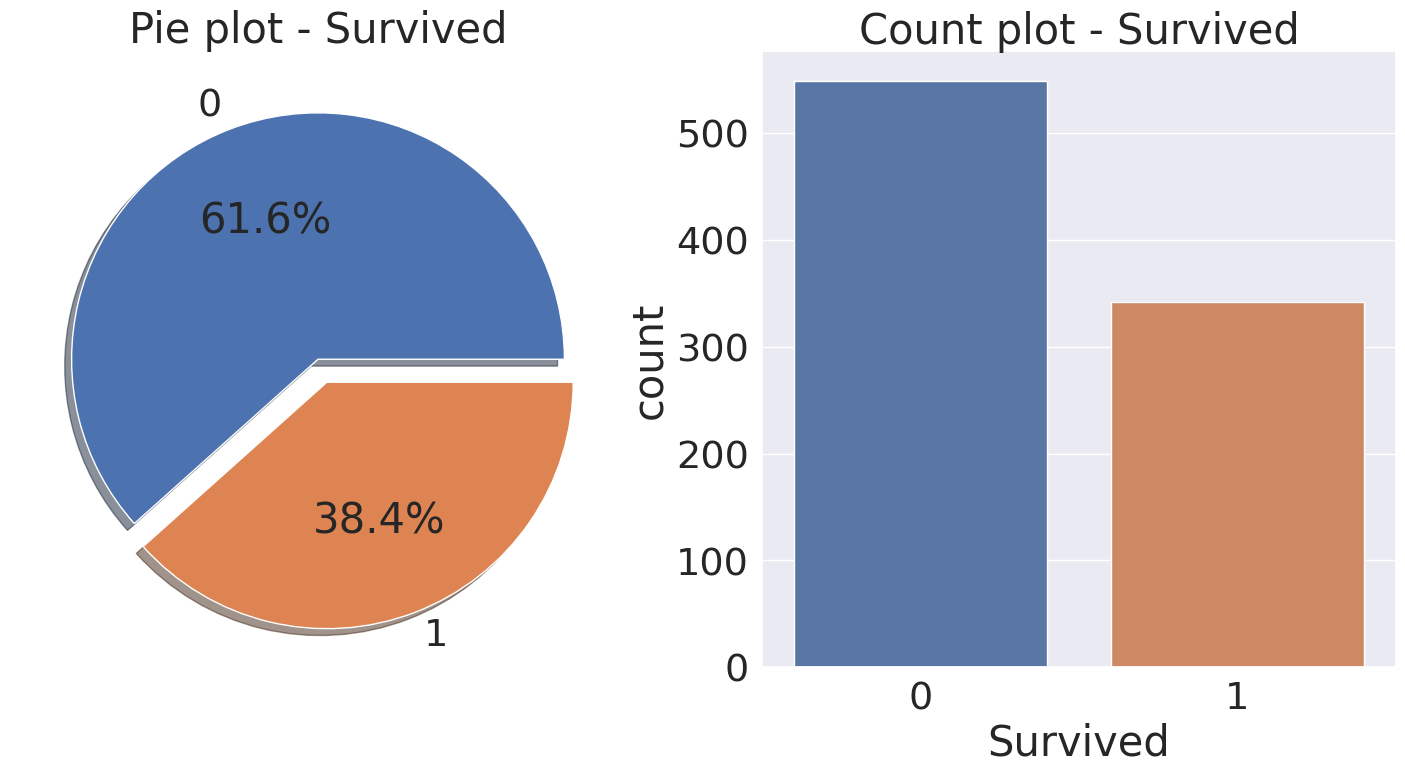

In [10]:
#summarize the target label, 'Survived'
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_ylabel('')
ax[0].set_title('Pie plot - Survived')

sns.countplot(x='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

In [11]:
#Analyze the categorized feature, "Pclass"
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [12]:
#Analyze the categorized feature, "Pclass"
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [13]:
#Analyze the categorized feature, "Pclass"
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

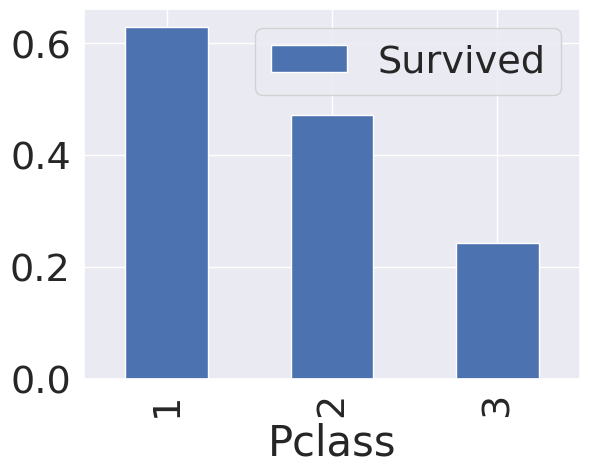

In [14]:
#Visualize the categorized feature, "Pclass"
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

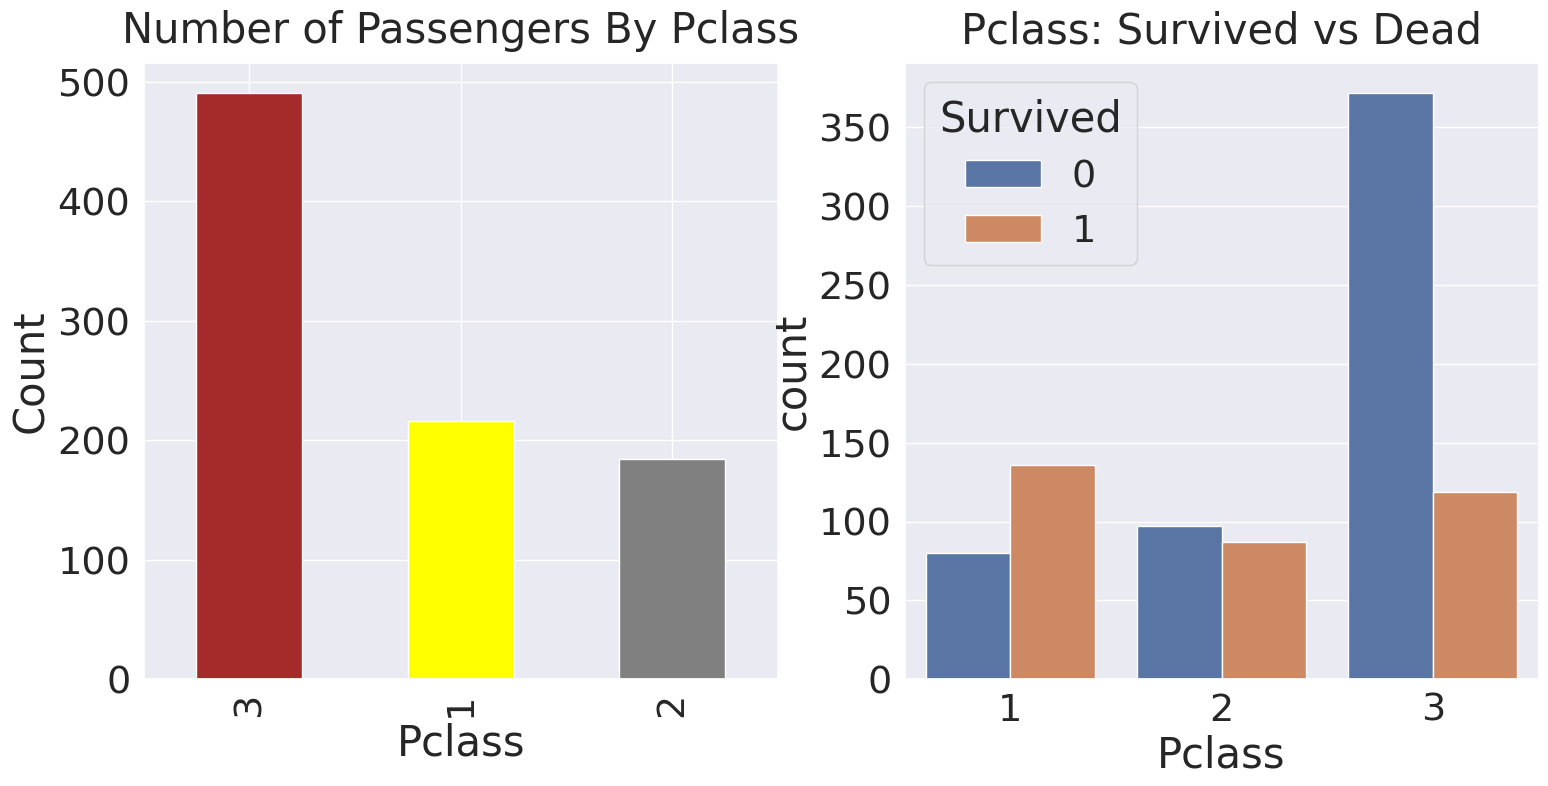

In [15]:
#Visualize the categorized feature, "Pclass"
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Pclass'].value_counts().plot.bar(color=['brown', 'yellow', 'gray'], ax=ax[0])
ax[0].set_ylabel('Count')
ax[0].set_title('Number of Passengers By Pclass', y=y_position)

sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

plt.show()

In [16]:
#Analyze the Categorial feature: Sex
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
#Analyze the Categorial feature: Sex
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


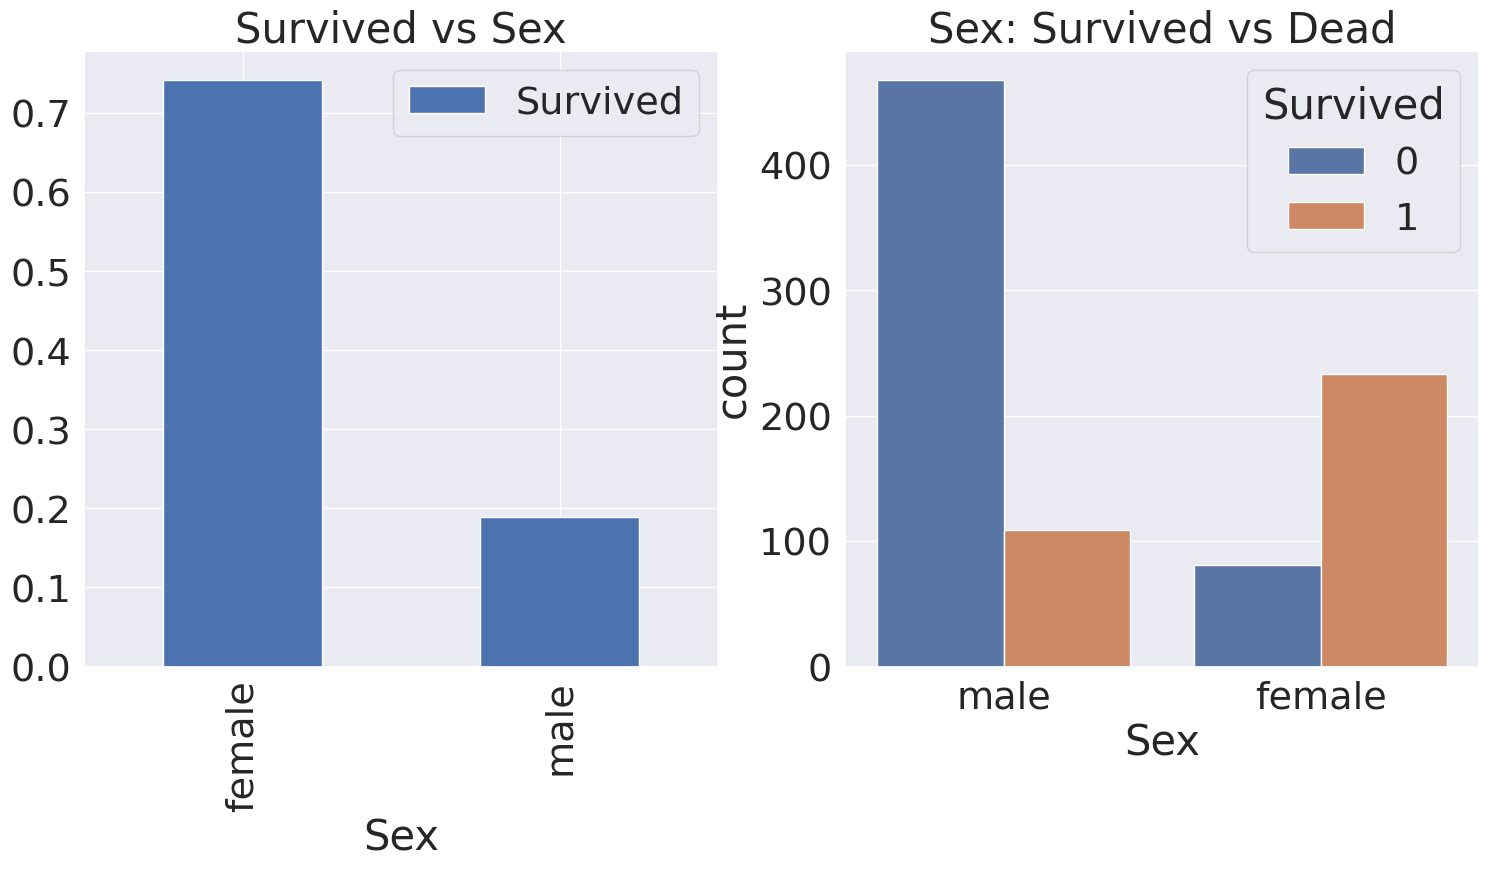

In [18]:
#Visualize the Categorial feature: Sex
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

We concluded that the 'Sex' and 'Pclass' are highly related with the target label 'Survived'

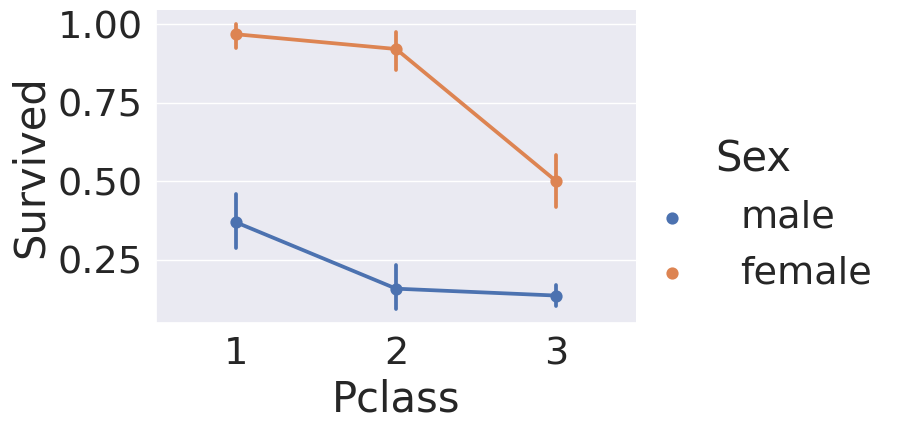

In [19]:
#Visualize to compare two features: sex, plcass
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, aspect=1.5, kind='point')

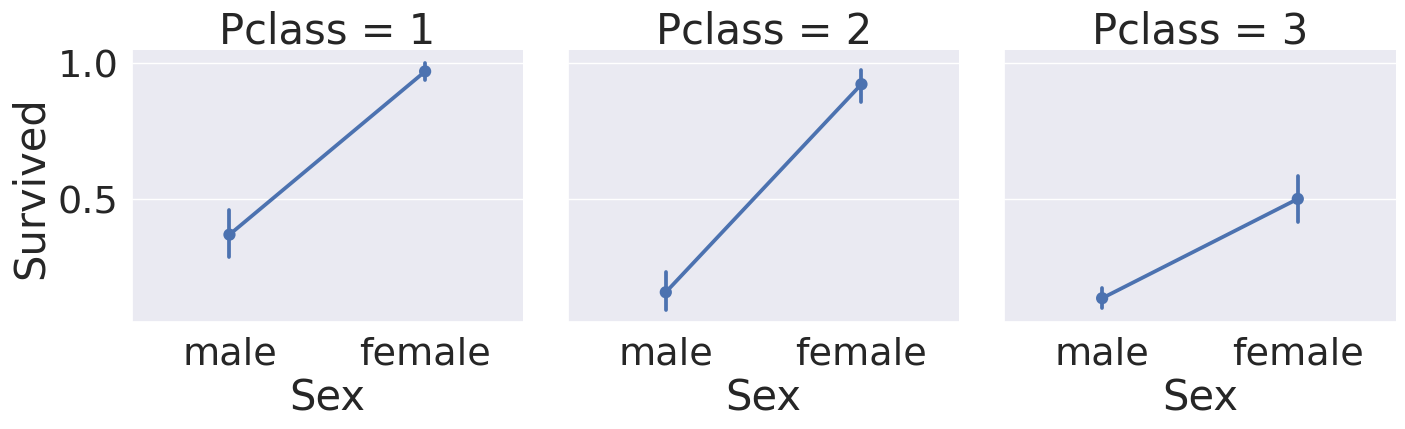

In [20]:
#Visualize to compare two features: sex, plcass
sns.catplot(x='Sex', y='Survived', col='Pclass', data=df_train,  aspect=1, kind='point')

In [21]:
#Analyze the Continuous feature: age
print(f"Oldest passenger: \t{df_train['Age'].max():.1f}")
print(f"Youngest passenger: \t{df_train['Age'].min():.1f}")
print(f"Average: \t\t{df_train['Age'].mean():.1f}")

Oldest passenger: 	80.0
Youngest passenger: 	0.4
Average: 		29.7


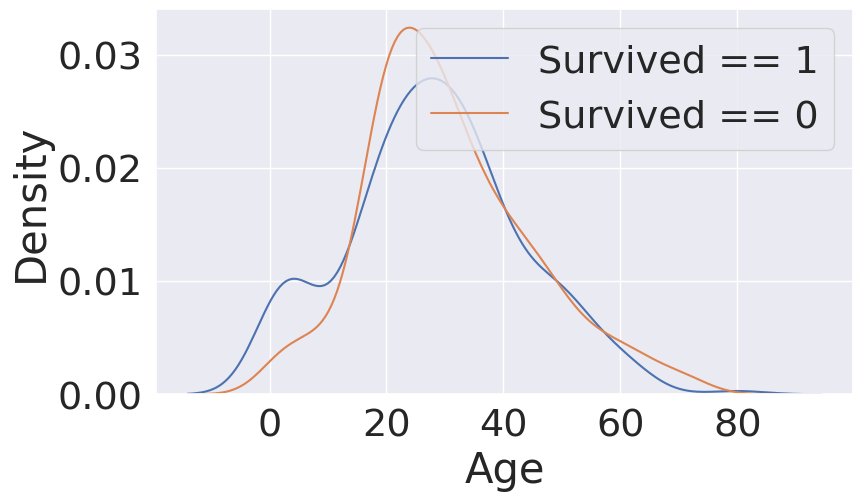

In [22]:
#Visualize the Continuous feature: age
fig, ax = plt.subplots(1, 1, figsize=(9, 5))

sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)

plt.legend(['Survived == 1', 'Survived == 0'])

plt.show()

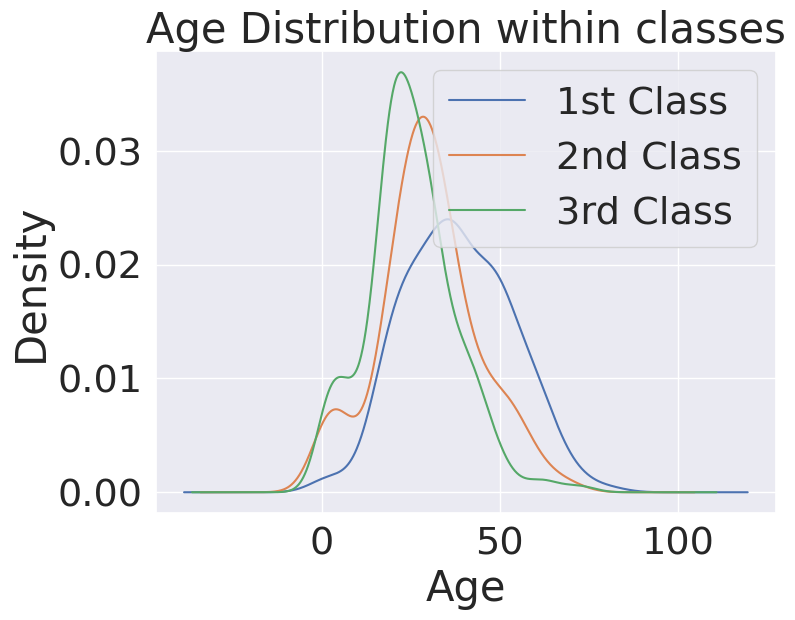

In [23]:
#Visualize the features: age, pclass
plt.figure(figsize=(8,6))

df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

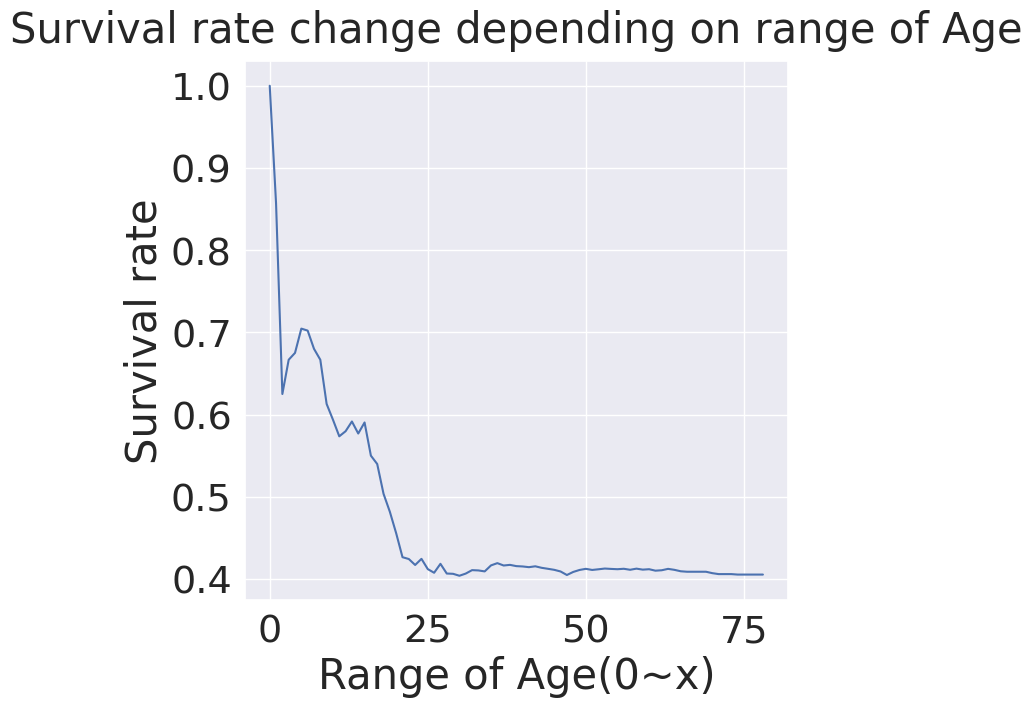

In [24]:
#Visualize the features: age, pclass
#Acuumulate the ratio
cummulateSurvRatio = list()
for i in range(1, 80):
    survTotal = df_train[df_train['Age']<i]['Survived'].sum()
    survRatio = survTotal / len(df_train[df_train['Age']<i]['Survived'])
    cummulateSurvRatio.append(survRatio)
    
plt.figure(figsize=(7, 7))
plt.plot(cummulateSurvRatio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')

plt.show()

### We concluded that the 'Sex', 'Pclass', 'Age' are highly related with the target label 'Survived'

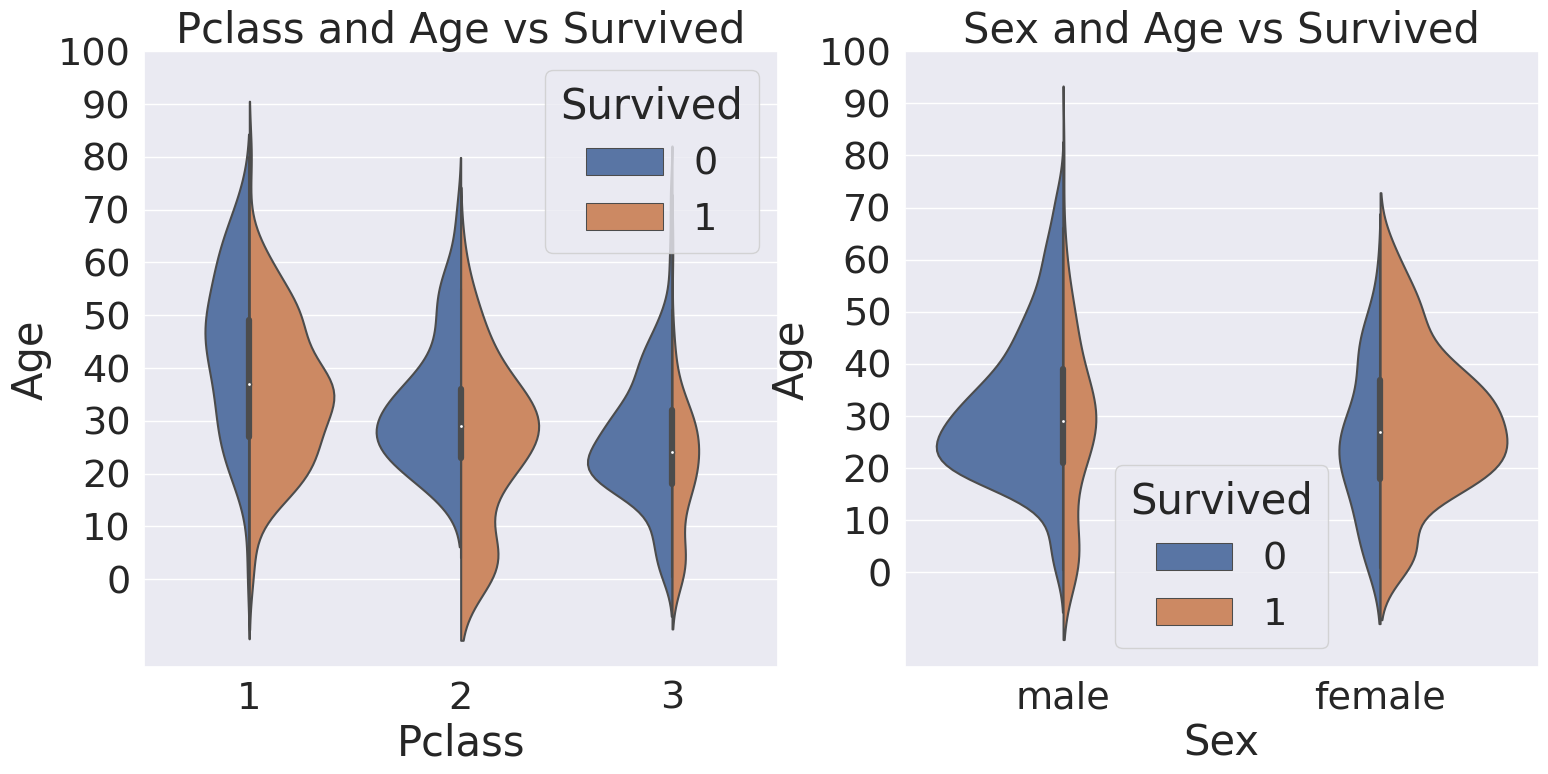

In [25]:
#Visualize the features: age, pclass, and age
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x="Sex", y="Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

<Axes: xlabel='Embarked'>

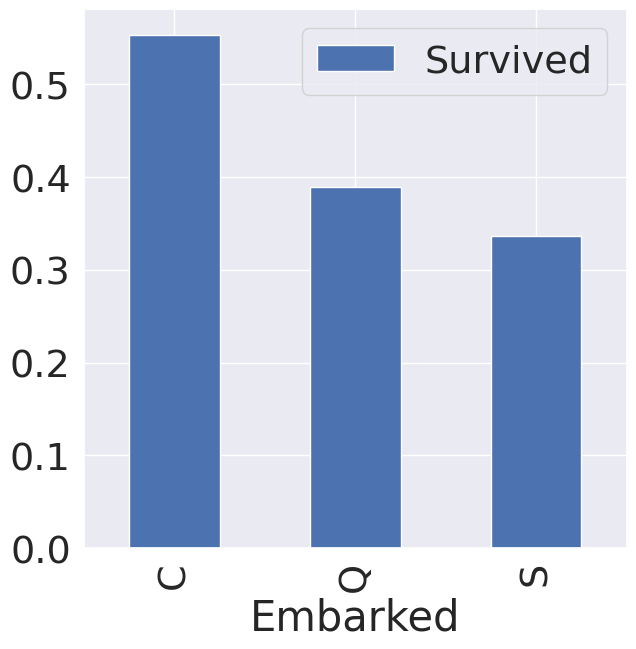

In [26]:
#Analyze the categorial feature: Embarked
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

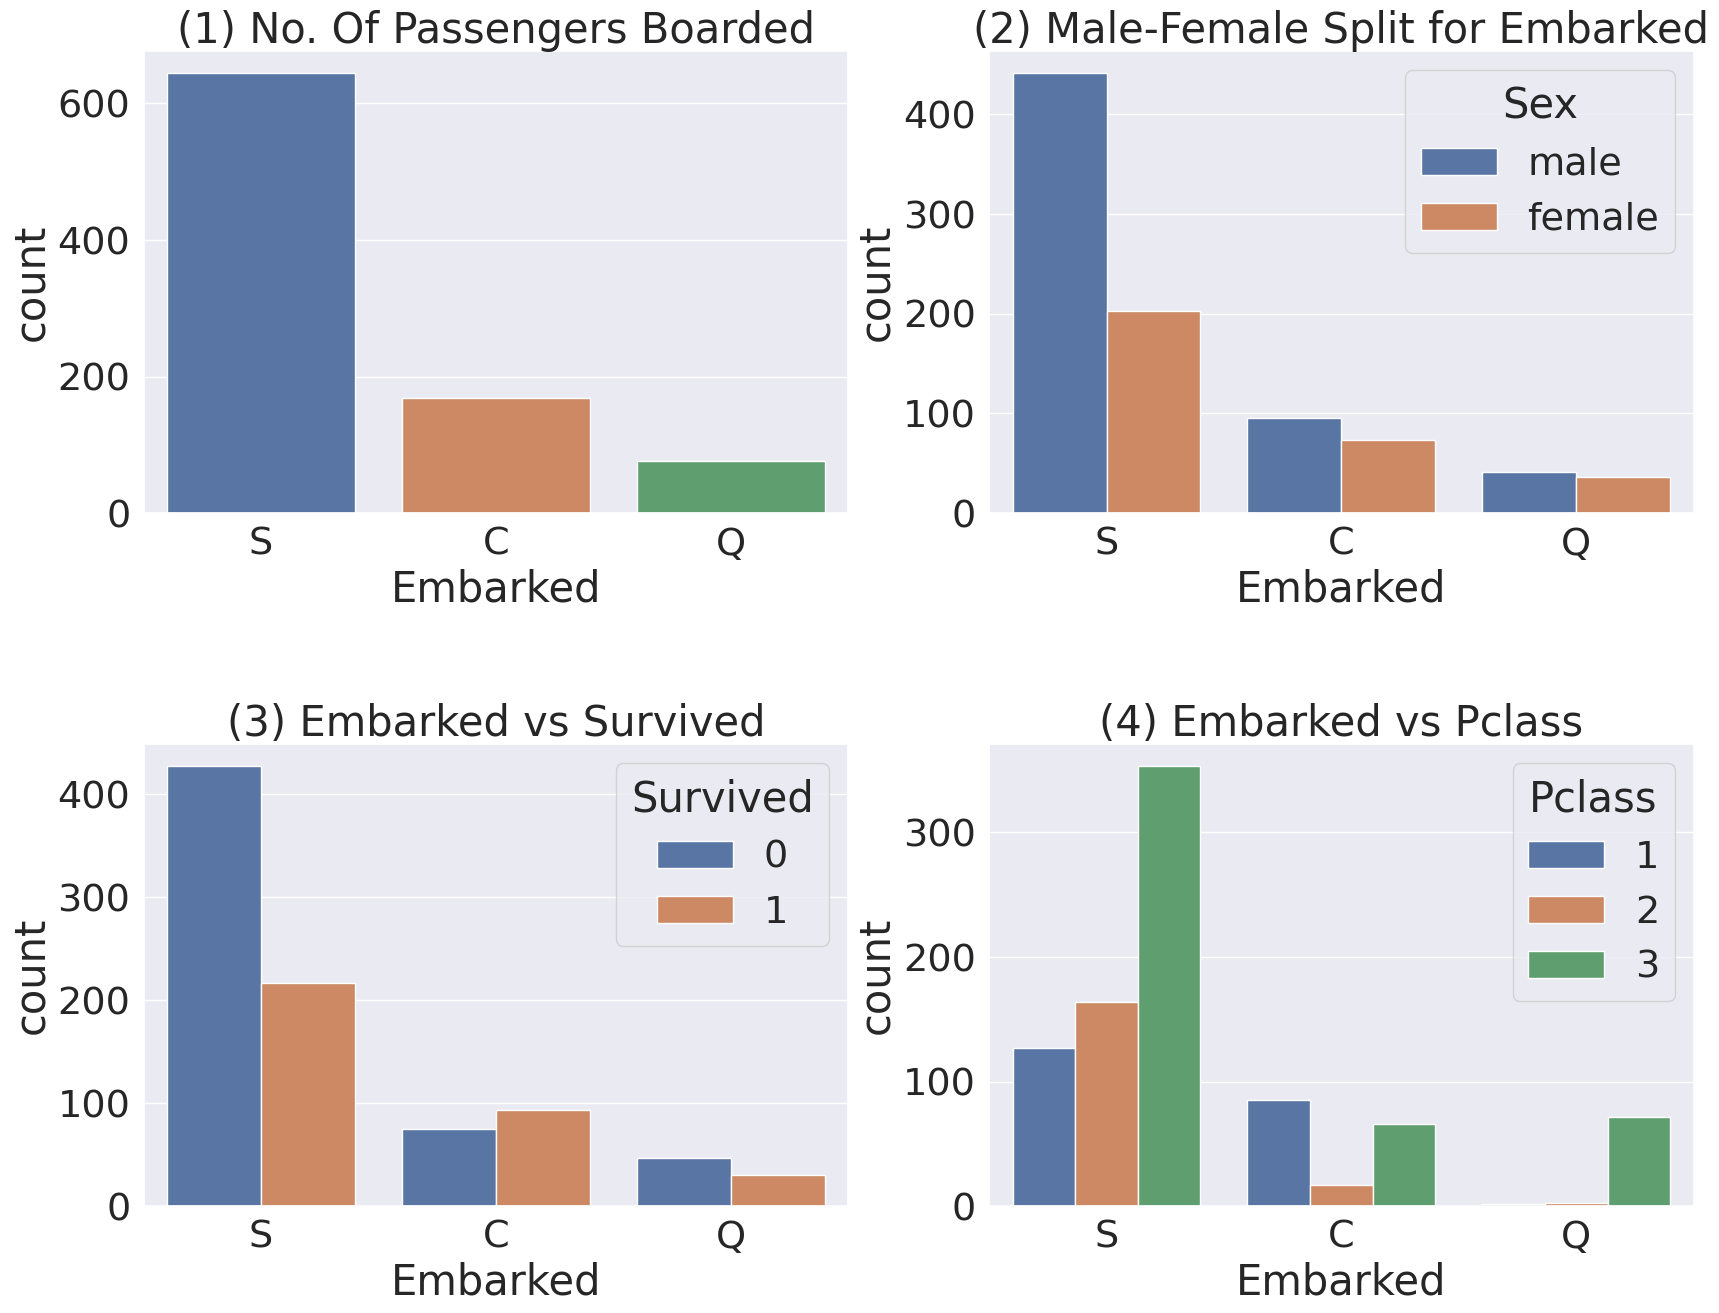

In [27]:
#Visualize the categorial feature, Embarked,
#with two major features, sex and pclass,
#and one target label, survived
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot(x='Embarked', data=df_train, ax=ax[0,0])
ax[0, 0].set_title('(1) No. Of Passengers Boarded')

sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [28]:
#feature engineering: integrate two features, 'SibSp' and 'Parch', to the new feature 'Family'
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 #sibling + parents + oneself
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
print(f"maximum family size: {df_train['FamilySize'].max()}")
print(f"minimum family size: {df_train['FamilySize'].min()}")

maximum family size: 11
minimum family size: 1


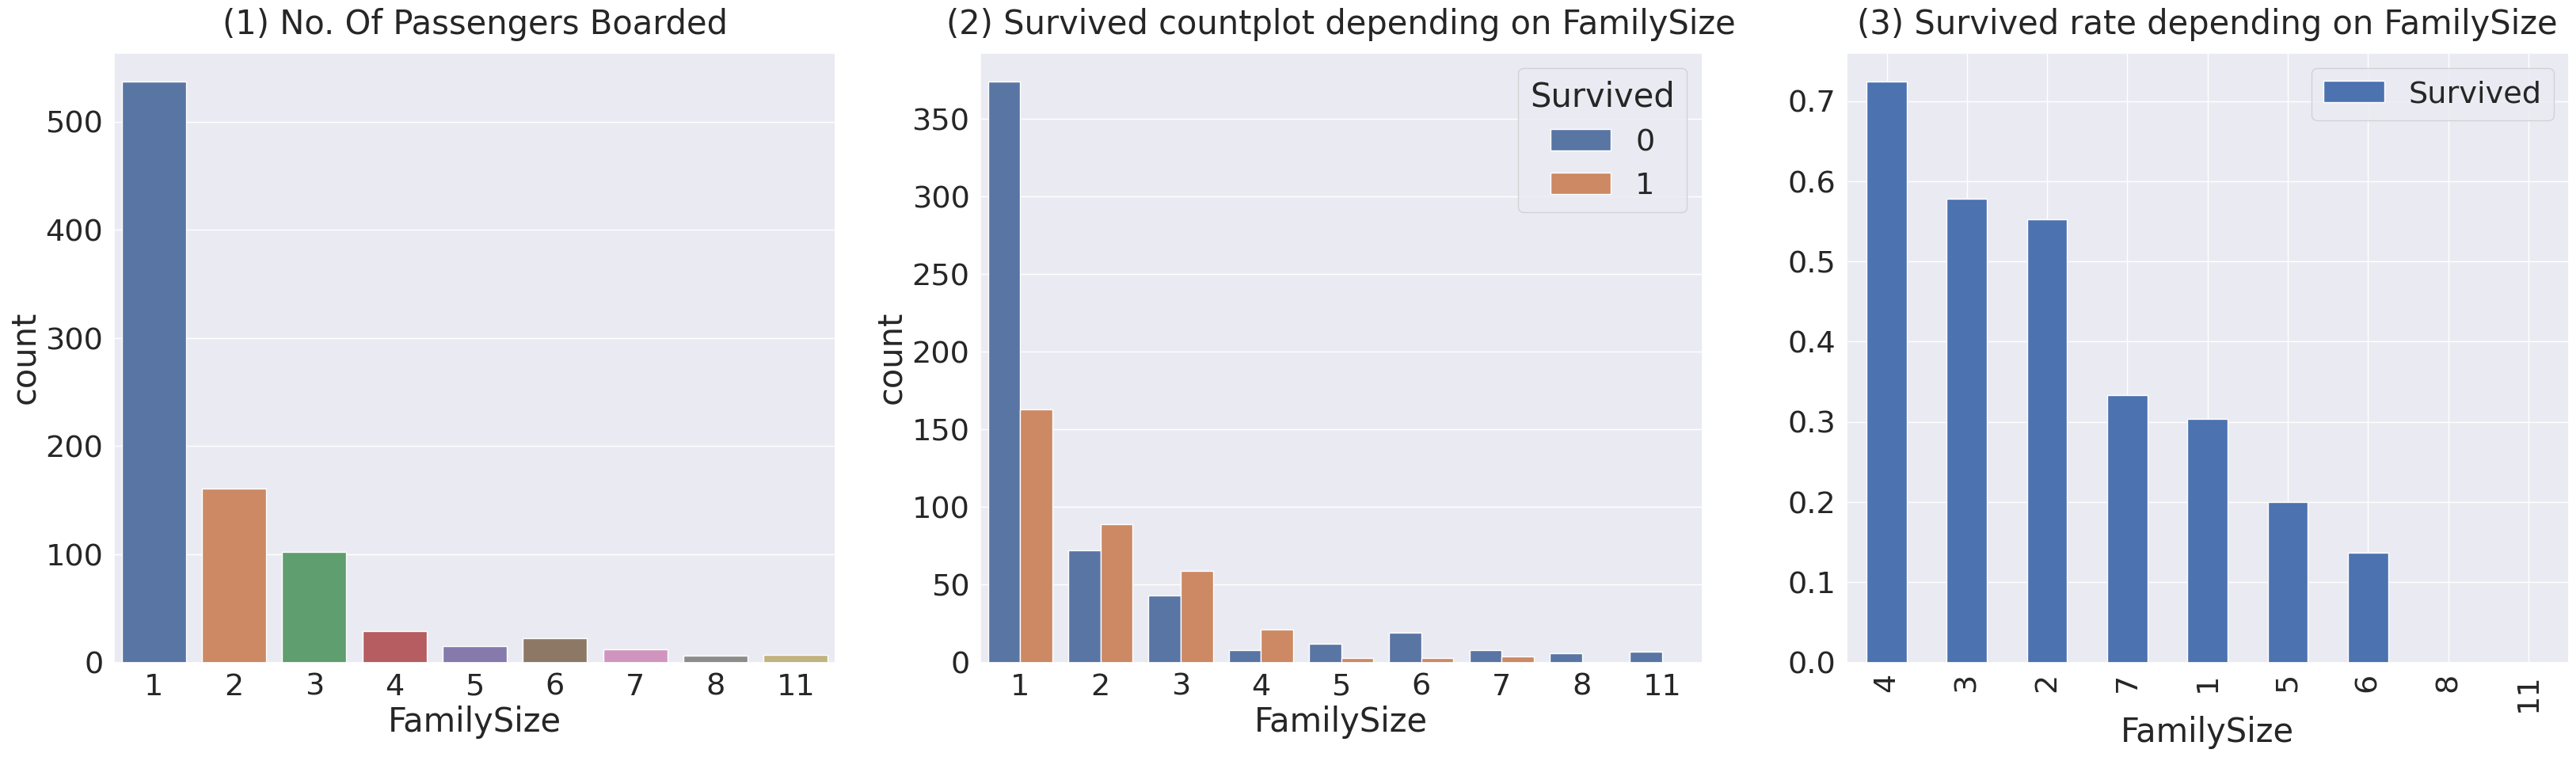

In [29]:
#Visualize the feature, 'FamilySize'
f, ax=plt.subplots(1, 3, figsize=(40,10))

sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

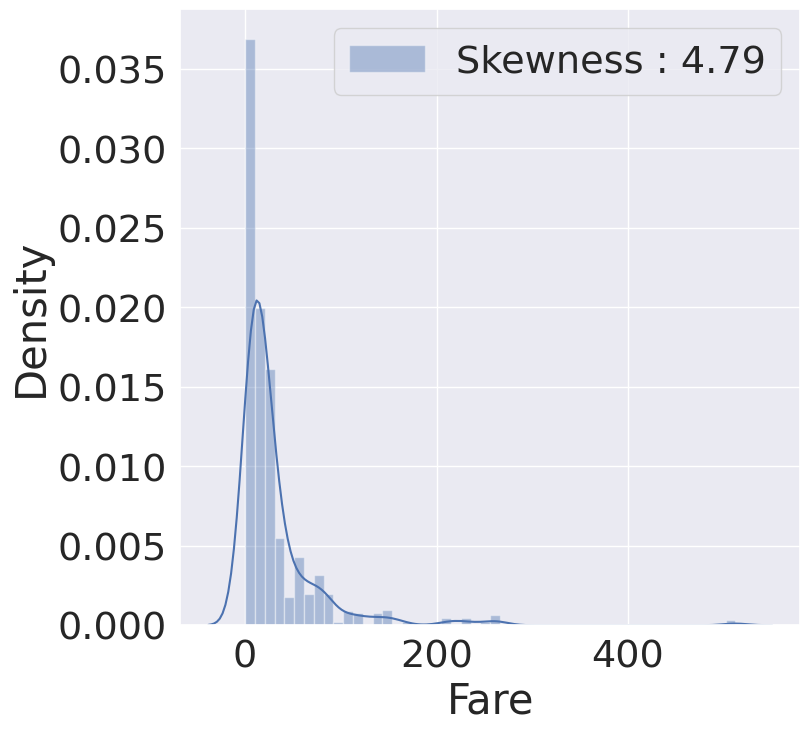

In [30]:
#Visualize the continuous feature: 'fare'
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [31]:
#The plot is imbalacned.
#Feature engineering: log transformation

#First, fill the null value of 'Fare' to the mean of the feature.
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

#Next, log transformation for both of the train and test data
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)

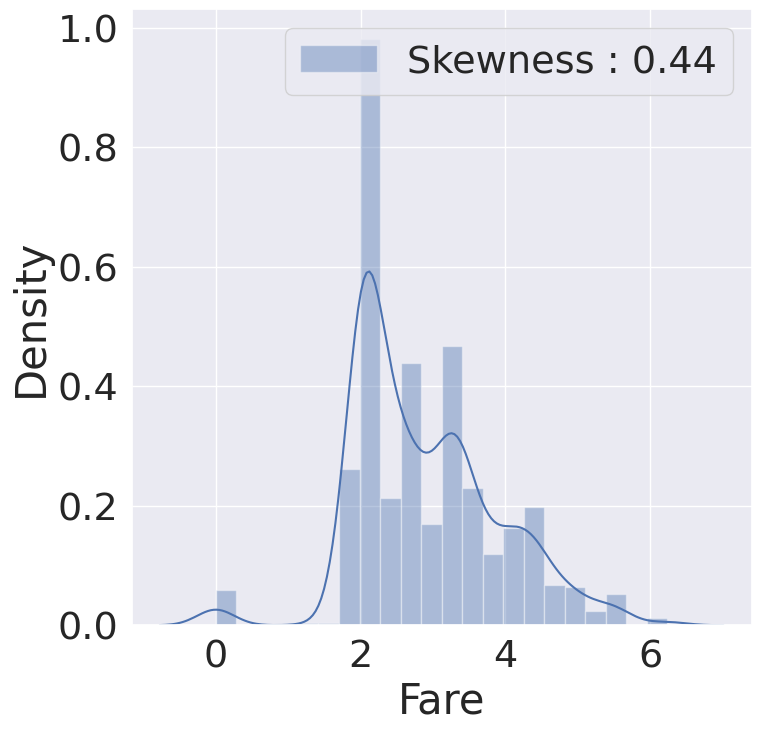

In [32]:
#Visualize the continuous feature: 'fare' again
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')